In [9]:
import cv2
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from sklearn.decomposition import PCA
import numpy as np
import os
import matplotlib.pyplot as plt

### Step 1: Image Preprocessing

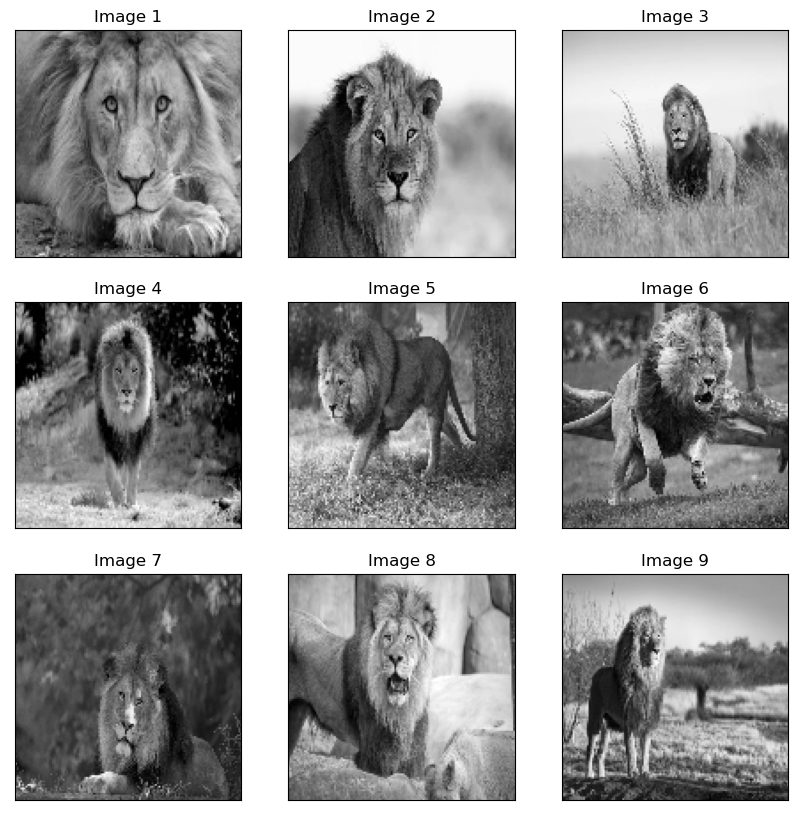

In [10]:
path_to_data = "Data"
images = []
y = []
for filename in os.listdir(path_to_data):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(path_to_data, filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (128, 128))
        images.append(img)
        y.append(filename.split("_")[0])

# Show the preprocessed images using Matplotlib
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axs.flat):
    ax.imshow(images[i], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"Image {i+1}")
plt.show()

#### Step 2: Feature Detection

In [ ]:
# Use Local Binary Patterns (LBP) to detect features
lbp_features = []
for img in images:
    # Set LBP parameters
    radius = 3
    n_points = 8 * radius
    # Extract LBP features
    lbp = local_binary_pattern(img, n_points, radius, method='uniform')
    # Flatten the LBP features to a 1D array
    lbp_flat = lbp.ravel()
    lbp_features.append(lbp_flat)
    
# Step 3: Feature Description
# LBP descriptors are already a form of feature description

#### Step 4: Feature Selection

In [11]:
# Use PCA to reduce the dimensionality of the LBP features
X = np.array(lbp_features)
pca = PCA(n_components=2)  # we have 3 classes, so we need at least 2 dimensions
X_pca = pca.fit_transform(X)

#### Step 5: Feature Extraction

Dimention Of The array (9, 16384)
Array of X_pca:  [[-347.19592887 -148.36067498]
 [  -4.77967666  132.20198029]
 [ -21.55601499   60.76932297]
 [-341.07792335   44.51584927]
 [ 972.57668162 -425.50951582]
 [-213.3754101  -557.04123993]
 [ 301.19618758  879.86617584]
 [-159.95800358  -73.28909292]
 [-185.82991165   86.84719527]]


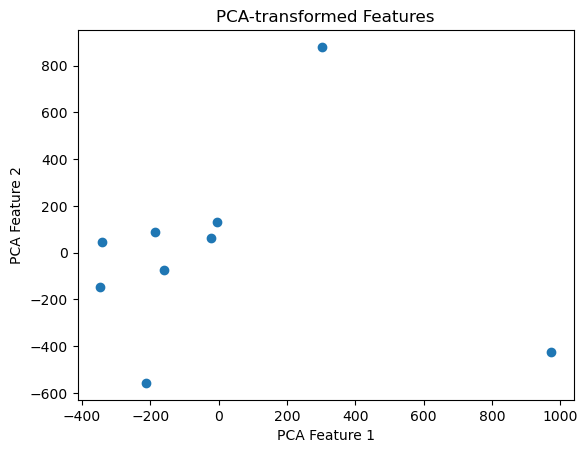

In [13]:
# The PCA-transformed features are now represented as a 1D array.
print(f"Dimention Of The array {X.shape}")
print("Array of X_pca: ", X_pca)

#Draw the PCA-transformed features
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('PCA-transformed Features')
plt.show()